/var/folders/k3/xf5hs7g94kg9b9n84jk35czh0000gn/T/ipykernel_66959/2533219114.py:22: DeprecationWarning: The class ``qiskit.circuit.library.basis_change.qft.QFT`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. ('Use qiskit.circuit.library.QFTGate or qiskit.synthesis.qft.synth_qft_full instead, for access to all previous arguments.',)
  qft_inv = QFT(3).inverse()


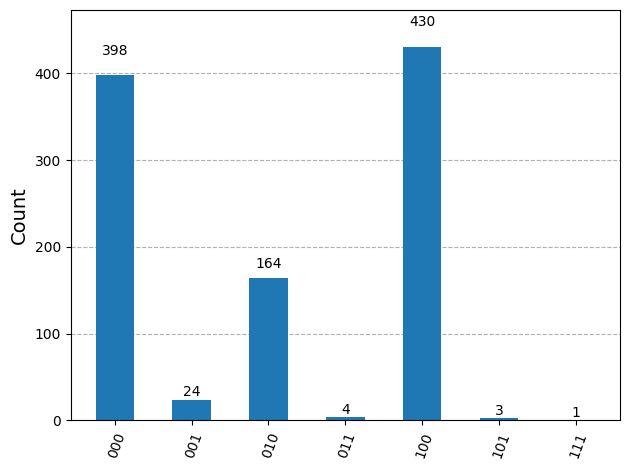

In [3]:
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit.circuit.library import QFT
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

# Create a quantum circuit with 4 qubits (3 for QPE, 1 for the eigenstate)
qc = QuantumCircuit(4, 3)  # The second argument specifies 3 classical bits for measurement

# Initialize the eigenstate to |1>
qc.x(3)  # The last qubit is qubit 3

# Apply Hadamard gates to the QPE qubits
qc.h([0, 1, 2])

# Apply the controlled unitary operations, using np.pi for π
angles = [2**(-i) * np.pi for i in range(1, 4)]  # Corresponds to a phase of π/4
for qubit in range(3):
    qc.cp(angles[qubit], qubit, 3)

# Apply inverse QFT
qft_inv = QFT(3).inverse()
qc.append(qft_inv, [0, 1, 2])

# Measure the QPE qubits
qc.measure([0, 1, 2], [0, 1, 2])

# Instantiate the Aer simulator
simulator = AerSimulator()

# Transpile the circuit for the simulator
transpiled_qc = transpile(qc, simulator)

# Run the simulation
result = simulator.run(transpiled_qc, shots=1024).result()

# Retrieve the measurement results
counts = result.get_counts()

# Display the histogram of the results
plot_histogram(counts)
